# Univariate Regression to predict the salary of an employee

### Goals : To predict the salary of employees

### Tasks :
1. Explore and Understand the Data
2. Describe and Visualize the Data
3. Preprocess the data 
4. Build Model
5. Evaluate the model

In [70]:
#import necessary libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [71]:
#import the data
salary_dataset = pd.read_csv('./Salary_Data.csv')
print(salary_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None


#### Insights of the dataset
- There are two columns in the dataset - YearsExperience and Salary
- Total number of records - 30
- None of the records are Null

In [72]:
salary_dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [73]:
salary_dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Model Chosen - Linear Regression

x (feature / variable) - YearsExperience

y (actual outcome / label) - Salary

y0 (predicted outcome) - Predicted Salary

#### Hypothesis function
y0 = wx + b

In [74]:
#splitting the dataset into 2/3 and 1/3
training_set = salary_dataset[0:20]
testing_set = salary_dataset[20:30]

#setting x and y
x = training_set['YearsExperience']
y = training_set['Salary']

The coefficients w and b can be combined to form a vector coeff.

The testing data containing x can be converted to a vector (column matrix) and 1 can be added as the last element of the matrix.

Hence, we get the predicted outcome as:

y0 = Transpose of coeff * X

In [75]:
#Calculation to get the minimum value of coefficient

def get_min_coeff(x,y):
    #n = number of elements in x
    n = np.size(x)
 
    x_mean = np.mean(x)
    y_mean = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    crossdeviation_xy = np.sum(y*x) - n*y_mean*x_mean
    deviation_xx = np.sum(x*x) - n*x_mean*x_mean
 
    # calculating regression coefficients
    w = crossdeviation_xy / deviation_xx
    b = y_mean - w*x_mean
 
    return (b, w)

In [76]:
#getting coefficient
coeff = get_min_coeff(x,y)
print(coeff)

(26577.400019513123, 9116.114200692724)


In [77]:
def plot_regression(x,y,coeff):
    #plotting input and actual output
    plt.scatter(x,y,color='r')
    
    #Predicted output
    y0 = coeff[0] + coeff[1]*x
    
    #plotting the model
    plt.plot(x, y0, color = "b")
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [78]:
#Evaluating the model - finding loss 
def get_loss(x,y,coeff): 
    y0 = coeff[0] + coeff[1]*x
    loss = np.mean((y - y0) ** 2)
    return loss

Mean Squared loss:
36477712.39516562
Accuracy score of training set
0.8236357371791212


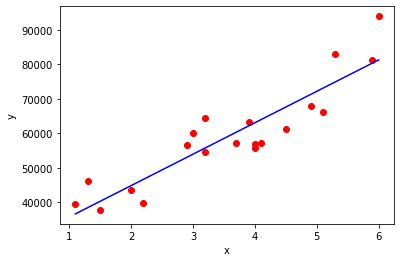

In [79]:
#Evaluation of Training data

#loss
print('Mean Squared loss:')
print(get_loss(x,y,coeff))

#Accuracy score of training set 
y0 = coeff[0] + coeff[1]*x
score =r2_score(y, y0)
print('Accuracy score of training set')
print(score)

#plotting regression
plot_regression(x,y,coeff)

Mean Square error of test data :  26392769.68698301
Accuracy score of test data: 0.7154263893579034


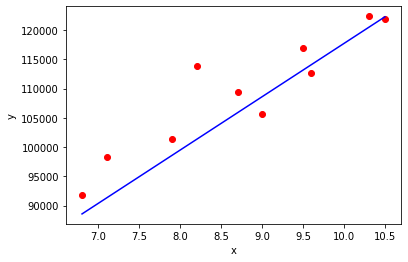

In [83]:
#Now predicting the test data set 
x_test = testing_set['YearsExperience']
y_test = testing_set['Salary']
y_test_0 = coeff[0] + coeff[1]*x_test

#Getting mean squared error
test_loss = get_loss(x_test,y_test,coeff)
print('Mean Square error of test data : ', test_loss)

#Getting accuracy score
test_score = r2_score(y_test,y_test_0)
print('Accuracy score of test data:', test_score)

#plotting regression
plot_regression(x_test,y_test,coeff)